### Online Retails Purchase
* [데이터 출처](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv)


In [67]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 출력에서 확인용
%matplotlib inline

# seaborn 스타일 변경
sns.set(style='ticks')

In [68]:
# 데이터 불러오기
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt = pd.read_csv(data_url, encoding='latin1') # 불러올 때 에러있어서 latin1 설정
print(online_rt.shape)
online_rt.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


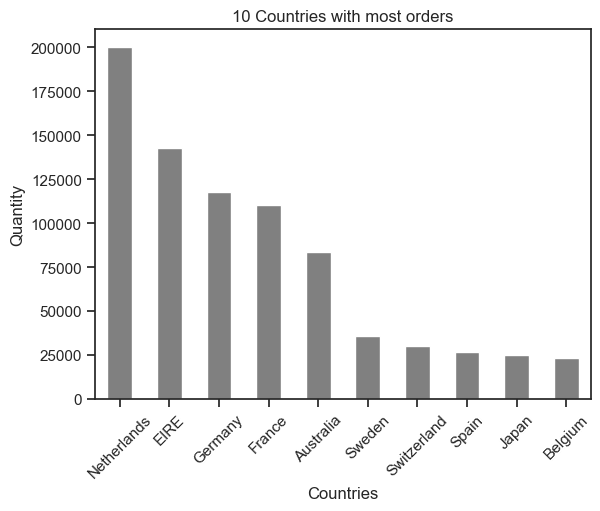

In [69]:
# Quantity가 가장 많은 나라 상위 10개에 대한 막대그래프 그리기 (영국 제외)
country_quantity_df = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)[1:11]

# 표 그리기
country_quantity_df.plot(kind='bar', color='grey')
# 상세 설정
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

plt.show()

In [70]:
# Quantity이랑 UnitPrice가 음수인 것은 제외하기
print(online_rt.shape)
online_rt = online_rt[(online_rt['Quantity'] > 0)&(online_rt['UnitPrice'] > 0)]
online_rt.reset_index(drop=True, inplace=True)
print(online_rt.shape)
online_rt.tail()

(541909, 8)
(530104, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
530103,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [75]:
online_rt.groupby(['CustomerID', 'Country']).Quantity.sum()

CustomerID  Country       
12346.0     United Kingdom    74215
12347.0     Iceland            2458
12348.0     Finland            2341
12349.0     Italy               631
12350.0     Norway              197
                              ...  
18280.0     United Kingdom       45
18281.0     United Kingdom       54
18282.0     United Kingdom      103
18283.0     United Kingdom     1397
18287.0     United Kingdom     1586
Name: Quantity, Length: 4346, dtype: int64